# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [3]:
#your code here
spaceship.shape

(8693, 14)

**Check for data types**

In [4]:
#your code here
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [6]:
#your code here
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [7]:
#your code here
spaceship = spaceship.dropna()

**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [10]:
#your code here

spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [14]:
features = spaceship[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

And also lets define our target.

In [ ]:
#your code here

target = spaceship['Transported']

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [15]:
#your code here

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [ ]:
#your code here
#we will use Classificator because our target variable is bool type. 

from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)

Fit the model to your data. Training model

In [19]:
#your code here

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Evaluate your model.

In [20]:
#your code here

X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
4533,0.0,0.0,0.0,0.0,0.0,0.0
6771,8.0,0.0,0.0,0.0,0.0,0.0
2407,30.0,0.0,632.0,0.0,673.0,2272.0
1795,46.0,8.0,652.0,0.0,5.0,90.0
1133,32.0,0.0,122.0,3700.0,337.0,1388.0
...,...,...,...,...,...,...
130,24.0,0.0,0.0,0.0,0.0,0.0
6406,55.0,0.0,0.0,0.0,0.0,0.0
7558,21.0,505.0,0.0,0.0,0.0,110.0
3822,26.0,0.0,1549.0,0.0,0.0,766.0


In [22]:
y_pred = knn.predict(X_test)
y_pred

array([ True,  True, False, ...,  True, False, False])

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy  = accuracy_score(y_test, y_pred)
print ('Model accuracy:', accuracy)

Model accuracy: 0.7602118003025718


In [26]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

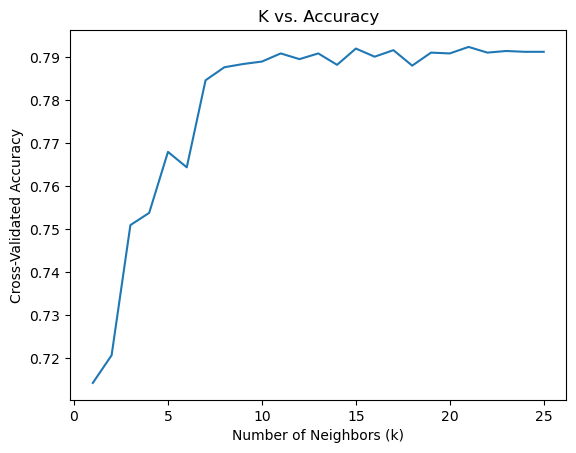

In [27]:
k_values = range (1, 26)
cross_valid_score = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cross_valid_score.append(scores.mean())


plt.plot(k_values, cross_valid_score)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K vs. Accuracy')
plt.show()

In [28]:
knn_1 = KNeighborsClassifier(n_neighbors=15)

In [29]:
knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [30]:
y_pred_1 = knn_1.predict(X_test)

In [31]:
accuracy  = accuracy_score(y_test, y_pred_1)
print ('Model accuracy:', accuracy)

Model accuracy: 0.7889561270801816


**Congratulations, you have just developed your first Machine Learning model!**